# **Problem Statement**

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

In [12]:
# loading data into a pandas dataframe
data = pd.read_csv("C:\\Users\\rober\\Documents\\Data Science\\Code (all)\\Portfolio\\MIT completed projects\\Datasets\\Customer_Personality_Segmentation.csv", sep="\t")

In [16]:
#Checking data types in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

1 float, 25 integer, and 3 object data types. Will need to check the missing data in the Income column. Will need to change the Education, Marital_Status, and Dt_Customer data to numerical values.

In [17]:
#Checking mean, std, etc.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240.0,NaN,NaN,NaN,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,NaN,NaN,NaN,1968.805804,11.984069,1893.0,1959.0,1970.0,1977.0,1996.0
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.0,NaN,NaN,NaN,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Kidhome,2240.0,NaN,NaN,NaN,0.444196,0.538398,0.0,0.0,0.0,1.0,2.0
Teenhome,2240.0,NaN,NaN,NaN,0.50625,0.544538,0.0,0.0,0.0,1.0,2.0
Dt_Customer,2240,663,31-08-2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.0,NaN,NaN,NaN,49.109375,28.962453,0.0,24.0,49.0,74.0,99.0
MntWines,2240.0,NaN,NaN,NaN,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0


In [18]:
# Minimum value for birthyear is suspect. Checking for other sus values
data[data["Year_Birth"]<1925] #chose 1925 since that would mean customer would be 100 years old

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


In [19]:
#Dropping the above 3 rows from the data set
data=data.drop(data[data['Year_Birth']<1925].index)

##### **Observations:**
The average household income is $52,247.25.

There are three (3) entries that have a suspicious birth year (before 1940). For the two customers born in 1893 and 1899, I'm guessing it is just a typo in the birth year. I decided to just outright delete those three rows as they will have a minimal impact to the overall dataset.

In [20]:
#Checking for missing values. Could also check above with data.info() and seeing ID 
#non-null values is lower than number of rows in the dataset. 
#Exact number easy to see with below code
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [21]:
#checking details of Income columns with no values
data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [22]:
#Replacing non-null Income values with Income mean
data = data.replace(np.nan, data['Income'].mean())

In [23]:
#Double-checking general dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   int64 

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2237.0,5590.726419,3245.118591,0.0,2829.0,5455.0,8427.0,11191.0
Year_Birth,2237.0,1968.901654,11.701917,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2237.0,52236.581563,25043.111823,1730.0,35523.0,51717.0,68281.0,666666.0
Kidhome,2237.0,0.444345,0.538467,0.0,0.0,0.0,1.0,2.0
Teenhome,2237.0,0.506482,0.544593,0.0,0.0,0.0,1.0,2.0
Recency,2237.0,49.104604,28.956073,0.0,24.0,49.0,74.0,99.0
MntWines,2237.0,303.995530,336.574382,0.0,24.0,174.0,504.0,1493.0
MntFruits,2237.0,26.270451,39.715972,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2237.0,166.916853,225.661158,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2237.0,37.523022,54.639909,0.0,3.0,12.0,50.0,259.0


##### **Observations:**

There are missing values for Income; 24 , to be exact. I replaced those missing values with the mean income for each. Minimal change to the Income mean before and after changes.

In [25]:
#Dropping ID column since keeping it will make it more difficult to analyze the rest of the data
data=data.drop(['ID'], axis=1)

In [26]:
#changing Dt_Customer from object to date format. This will make it easier to visualize it in the Histograms below.
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [16]:
#Checking unique entries for Education column
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [17]:
#Changing Education values to numerical values
data['Education']=data['Education'].replace({
    'Basic':0,
    '2n Cycle':1,
    'Graduation':2,
    'Master':3,
    'PhD':4})

In [18]:
#Checking Marital Status values
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
#Changing Marital Status values to numerical values
data['Marital_Status']=data['Marital_Status'].replace({
    'Single':0,
    'Together':1,
    'Married':2,
    'Divorced':3,
    'Widow':4,
    'Alone':5,
    'Absurd':6,
    'YOLO':7,
})

In [20]:
data[data.duplicated()].head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
83,1963,3,1,38620.0,0,0,2013-05-11,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0
179,1951,1,2,78497.0,0,0,2013-12-01,44,207,26,447,75,0,223,1,5,7,12,2,0,0,0,1,0,0,3,11,0
281,1976,2,1,51369.0,0,1,2012-10-25,84,297,7,79,0,11,182,2,8,2,4,8,0,0,0,0,0,0,3,11,0
282,1946,2,1,37760.0,0,0,2012-08-31,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0
363,1978,4,2,37717.0,1,0,2012-11-23,31,9,0,6,4,1,5,1,1,0,2,9,0,0,0,0,0,0,3,11,0


In [21]:
#removing duplicates
data=data[~data.duplicated()]

In [22]:
#re-checking dataset
data.shape

(2055, 28)

In [23]:
#re-checking various data stats
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Year_Birth,2055.0,1968.891484,1940.0,1959.0,1970.0,1977.0,1996.0,11.666261
Education,2055.0,2.46472,0.0,2.0,2.0,3.0,4.0,1.005146
Marital_Status,2055.0,1.498783,0.0,1.0,2.0,2.0,7.0,1.080893
Income,2055.0,52345.047181,1730.0,35694.5,52034.0,68211.0,666666.0,25383.855716
Kidhome,2055.0,0.445742,0.0,0.0,0.0,1.0,2.0,0.53763
Teenhome,2055.0,0.509489,0.0,0.0,0.0,1.0,2.0,0.54655
Dt_Customer,2055,2013-07-11 07:26:21.897810176,2012-07-30 00:00:00,2013-01-17 00:00:00,2013-07-12 00:00:00,2014-01-01 00:00:00,2014-06-29 00:00:00,NaN
Recency,2055.0,48.946472,0.0,24.0,49.0,74.0,99.0,28.992277
MntWines,2055.0,303.986861,0.0,23.0,174.0,504.0,1493.0,336.503064
MntFruits,2055.0,26.2,0.0,1.0,8.0,33.0,199.0,39.688041


##### **Observations:**

1. Education and Marital_Status, are both strings, so I converted them to a numerical (int) value.
2. The date format was also a string value, so I changed that to dd-mm-yy format, as well. I have a feeling I might have to drop that column later.
3. I removed the ID category since keeping it will make it more difficult to analyze the rest of the data.
4. Ran the appropriate code to find any and all duplicate data. There were 182 duplicate rows removed.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **As required by project assignment:**
Explore all the variables and provide observations on their distributions. (histograms and boxplots)

**Observations are made below the final histogram and box plot.**

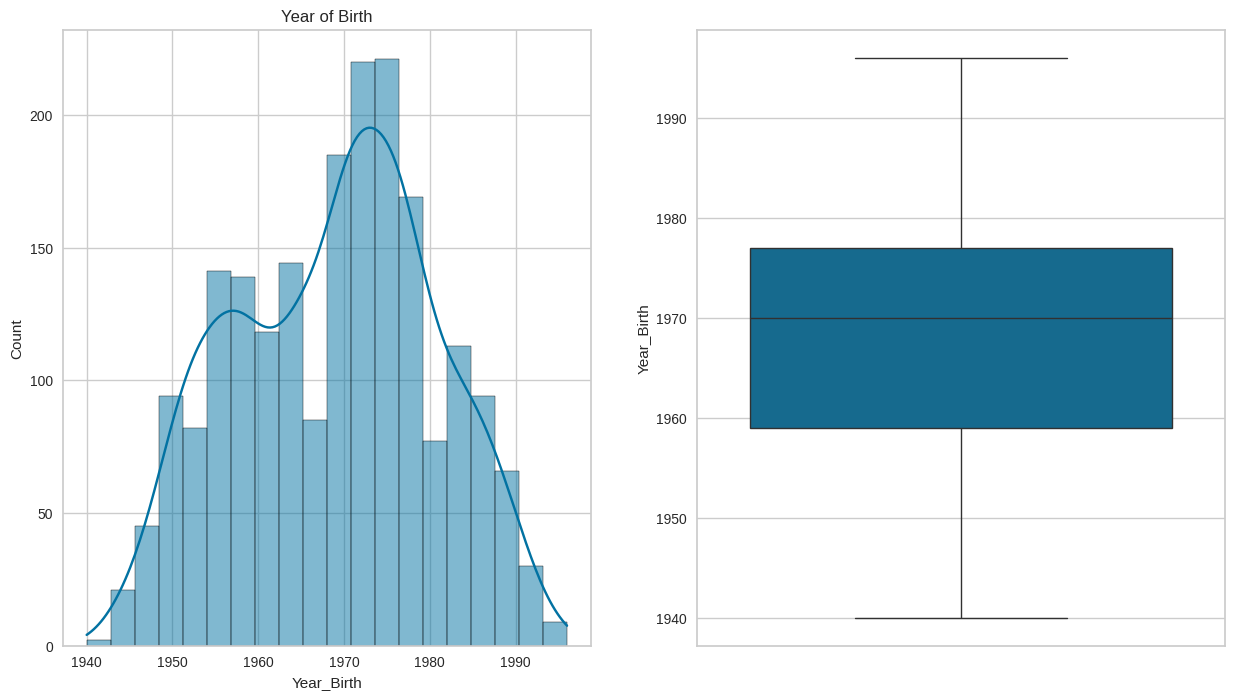

In [24]:
#histogram and box plot for Year_Birth
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Year of Birth')
sns.histplot(data['Year_Birth'], kde=True); #added KDE to better visualize the distribution
plt.subplot(1,2,2)
sns.boxplot(data['Year_Birth']);

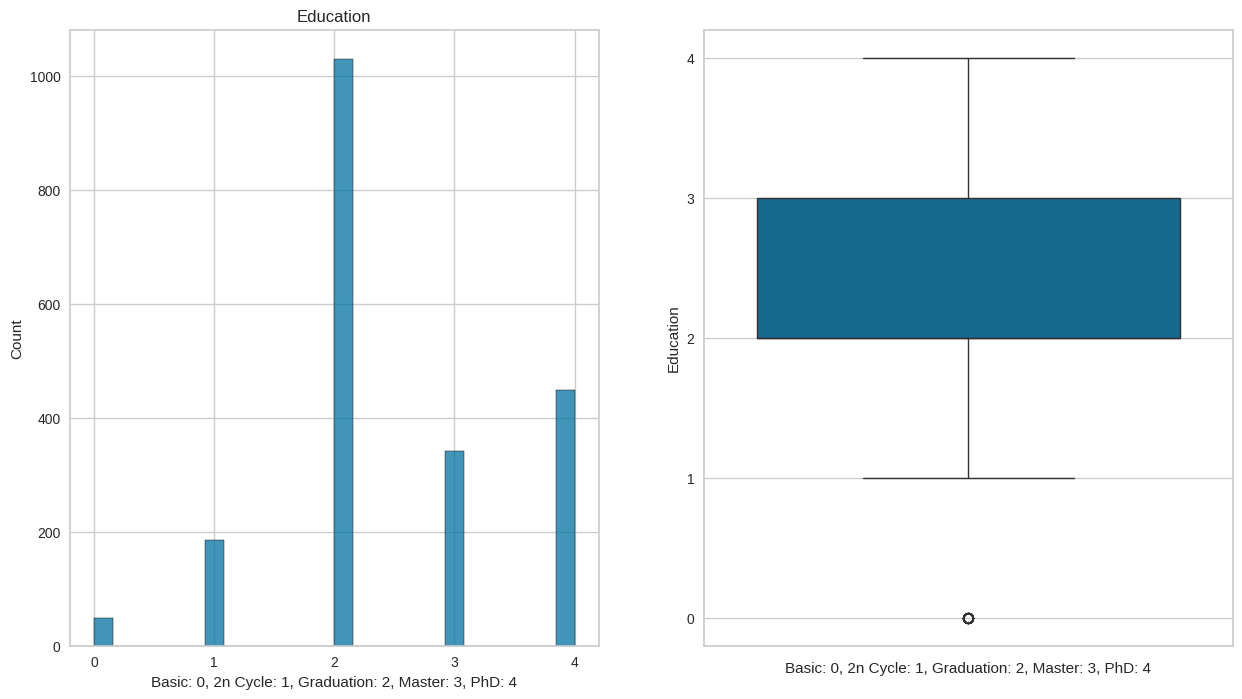

In [25]:
#histplot and boxplot for Education
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel('Basic: 0, 2n Cycle: 1, Graduation: 2, Master: 3, PhD: 4')
plt.xticks([0,1,2,3,4])
plt.title('Education')
sns.histplot(data['Education']);
plt.subplot(1,2,2)
sns.boxplot(data['Education']);
plt.xlabel('Basic: 0, 2n Cycle: 1, Graduation: 2, Master: 3, PhD: 4')
plt.yticks([0,1,2,3,4]);

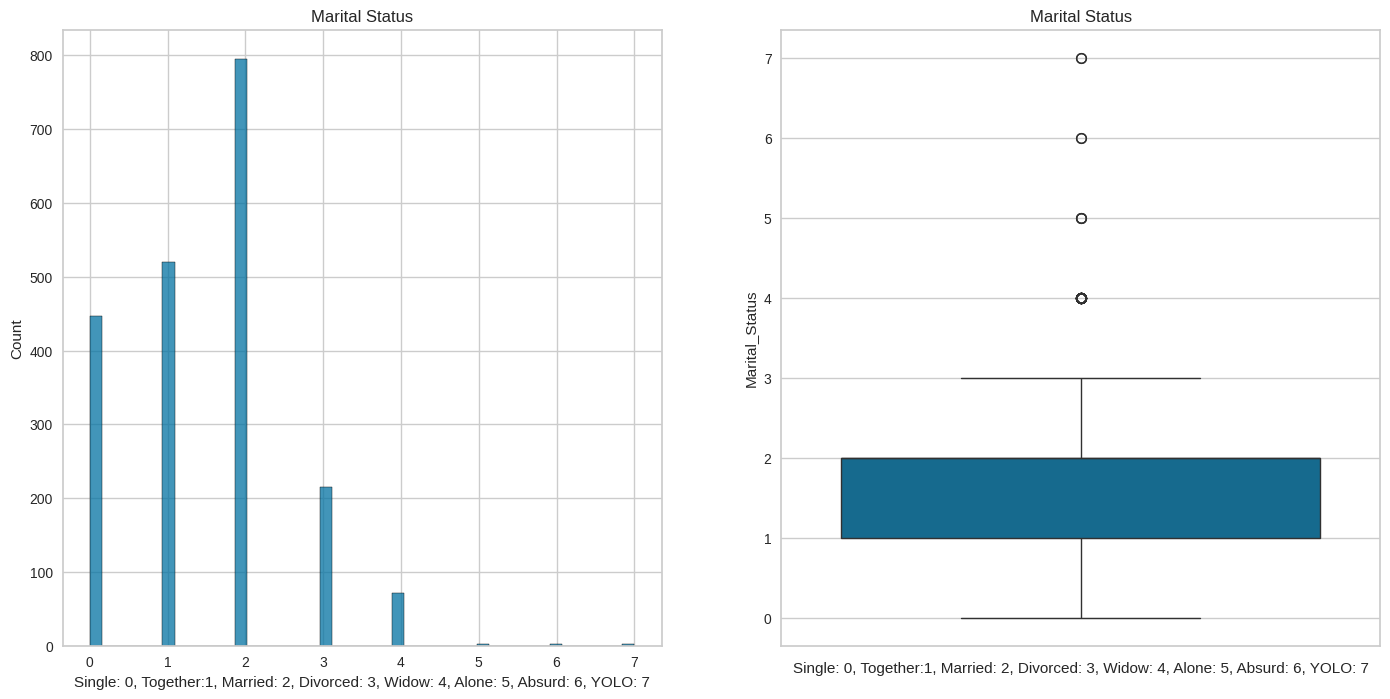

In [26]:
#histplot and boxplot for Marital Status
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.title('Marital Status')
plt.xlabel('Single: 0, Together:1, Married: 2, Divorced: 3, Widow: 4, Alone: 5, Absurd: 6, YOLO: 7')
plt.xticks([0,1,2,3,4,5,6,7])
sns.histplot(data['Marital_Status']);
plt.subplot(1,2,2)
sns.boxplot(data['Marital_Status']);
plt.title('Marital Status')
plt.xlabel('Single: 0, Together:1, Married: 2, Divorced: 3, Widow: 4, Alone: 5, Absurd: 6, YOLO: 7')
plt.yticks([0,1,2,3,4,5,6,7]);

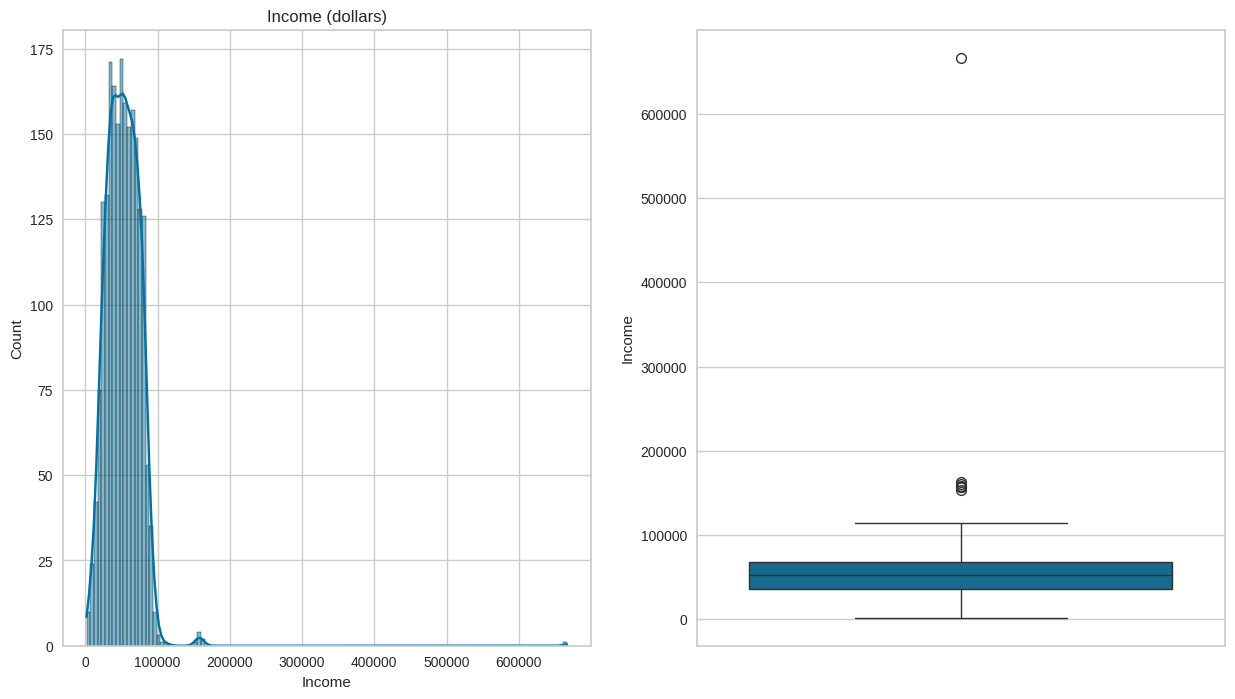

In [27]:
#Histplot and boxplot for Income
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Income (dollars)')
sns.histplot(data['Income'],kde=True); #added KDE to better visualize the distribution
plt.subplot(1,2,2)
sns.boxplot(data['Income']);

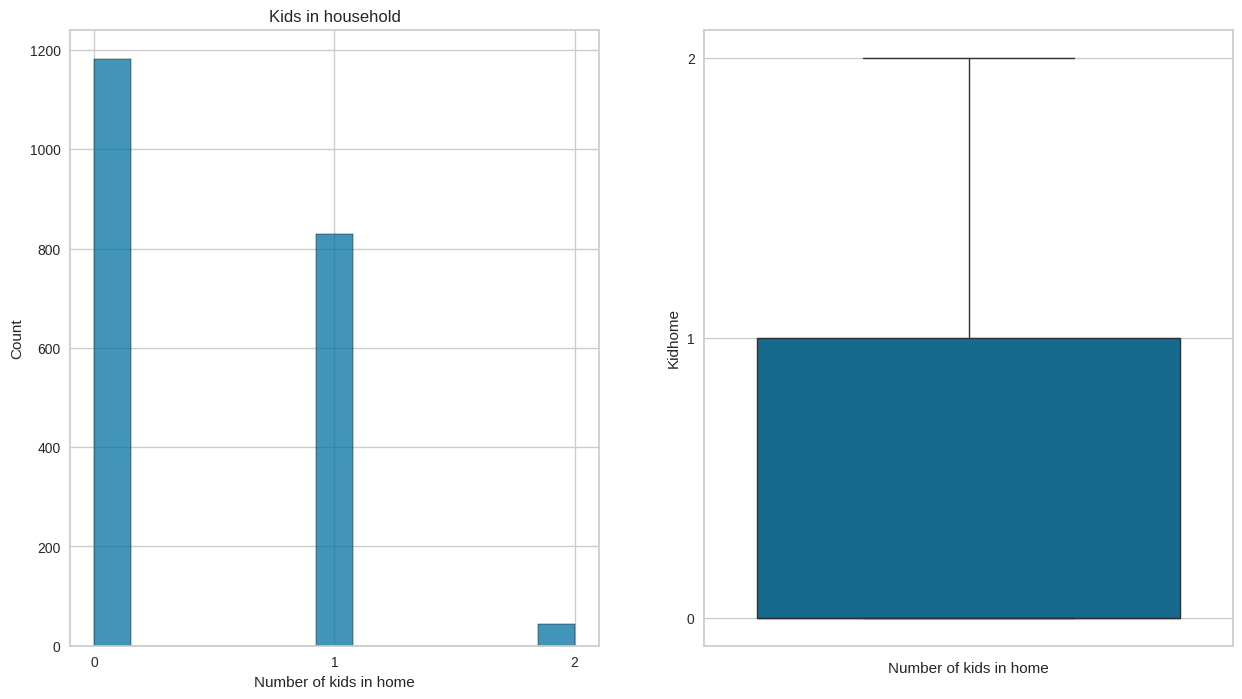

In [28]:
#Histplot and boxplot for Kidhome. Took out continuous variables on the x/y axes since you can't have 1.5 kids
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(data['Kidhome']);
plt.title('Kids in household')
plt.xlabel('Number of kids in home')
plt.xticks([0,1,2])
plt.subplot(1,2,2)
plt.xlabel('Number of kids in home')
plt.yticks([0,1,2])
sns.boxplot(data['Kidhome']);

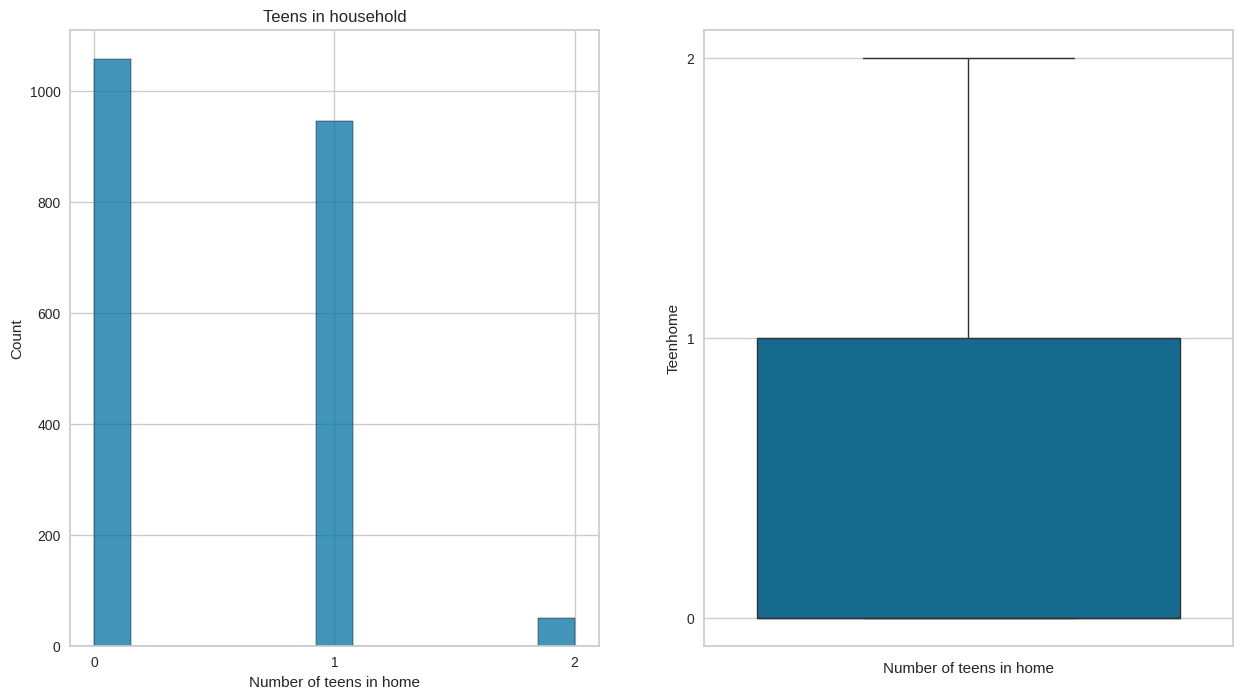

In [29]:
#Histplot and boxplot for Teenhome. Took out continuous variables on the x/y axes since you can't have 1.5 teens
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Teens in household')
plt.xlabel('Number of teens in home')
plt.xticks([0,1,2])
sns.histplot(data['Teenhome']);
plt.subplot(1,2,2)
plt.xlabel('Number of teens in home')
plt.yticks([0,1,2])
sns.boxplot(data['Teenhome']);

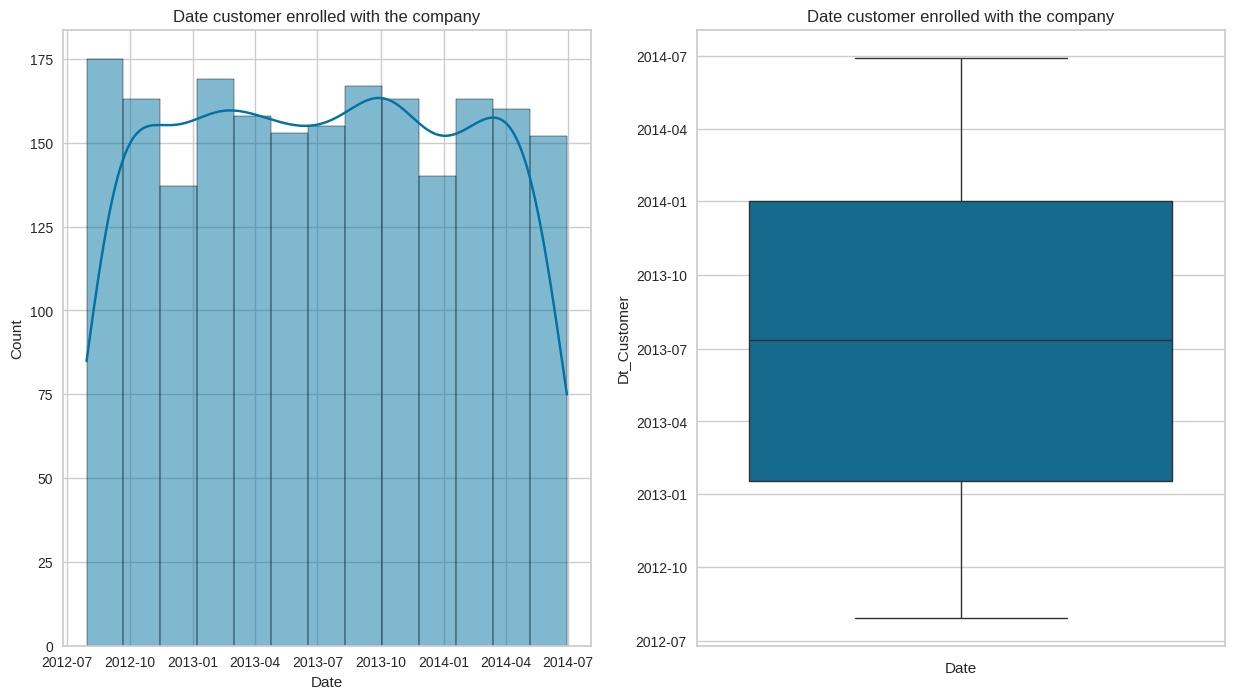

In [30]:
#Histplot and boxplot for Dt_Customer
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(data['Dt_Customer'], kde=True); #added KDE to better visualize the distribution
plt.title('Date customer enrolled with the company')
plt.xlabel('Date')
plt.subplot(1,2,2)
plt.title('Date customer enrolled with the company')
plt.xlabel('Date')
sns.boxplot(data['Dt_Customer']);

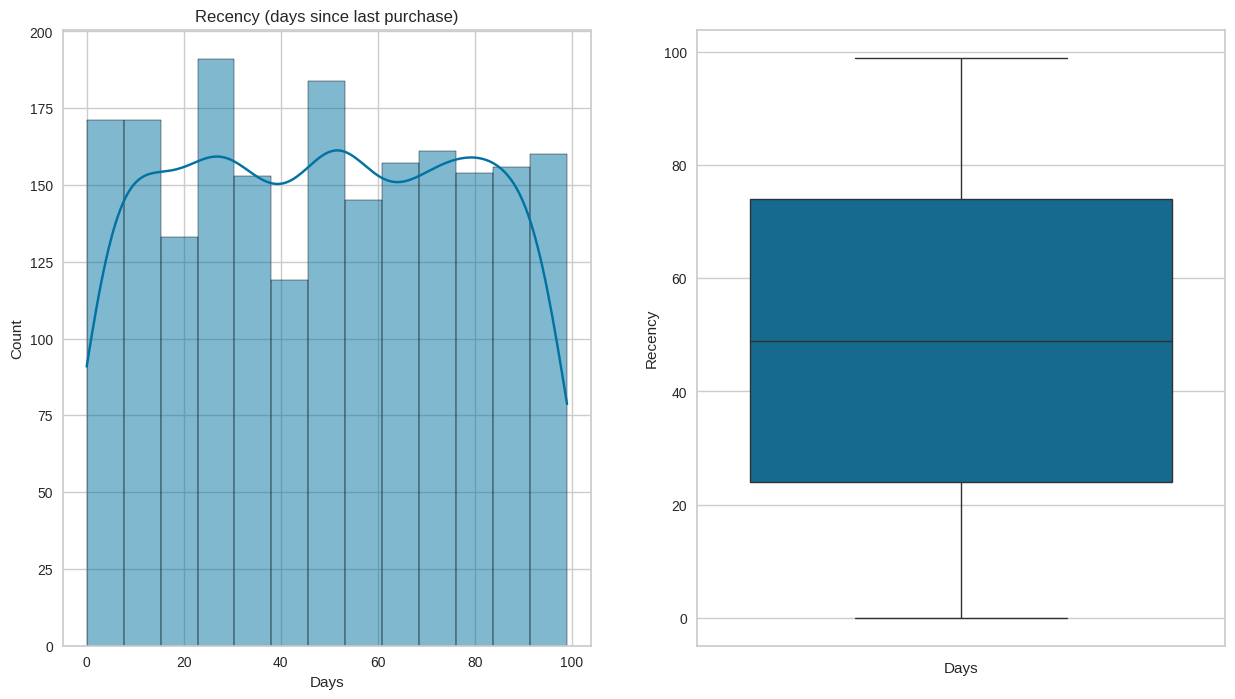

In [31]:
#Histplot and boxplot for Recency
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Recency (days since last purchase)')
sns.histplot(data['Recency'], kde=True); #added KDE to better visualize the distribution
plt.xlabel('Days')
plt.subplot(1,2,2)
plt.xlabel('Days')
sns.boxplot(data['Recency']);

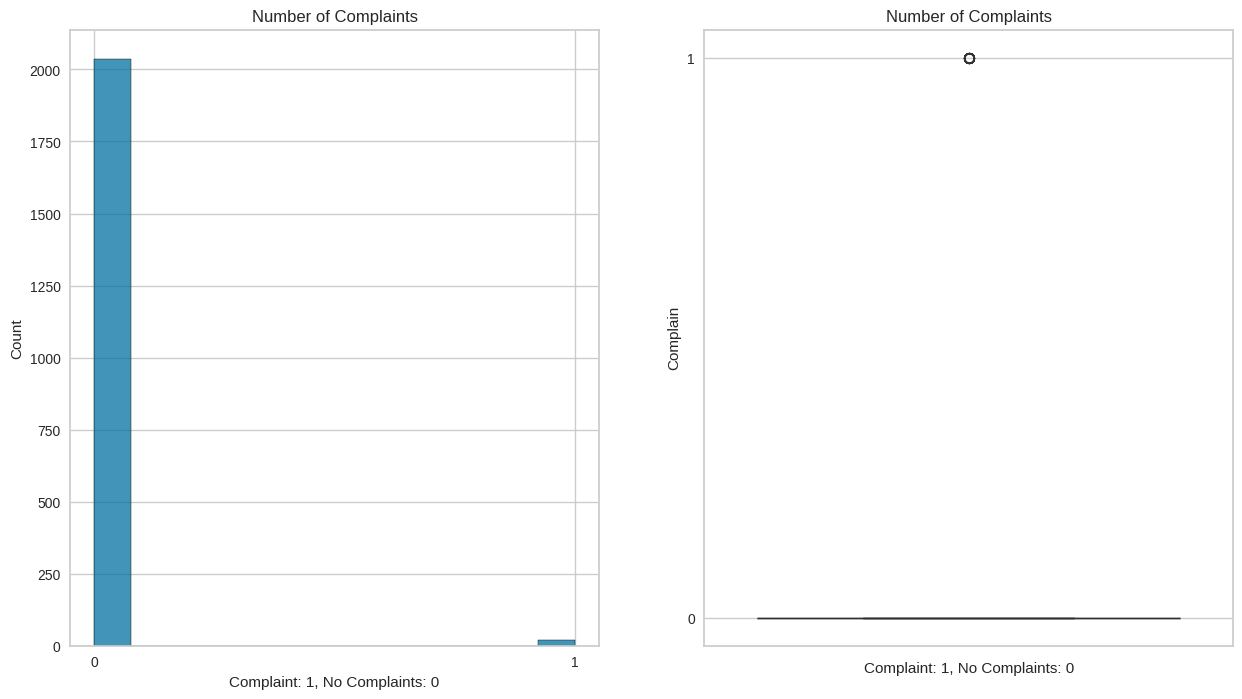

In [32]:
#Histplot and boxplot for Complain
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of Complaints')
plt.xticks([0,1])
sns.histplot(data['Complain']);
plt.xlabel('Complaint: 1, No Complaints: 0')
plt.subplot(1,2,2)
plt.xlabel('Complaint: 1, No Complaints: 0')
plt.title('Number of Complaints')
plt.yticks([0,1])
sns.boxplot(data['Complain']);

In [33]:
#SPENDING INFO

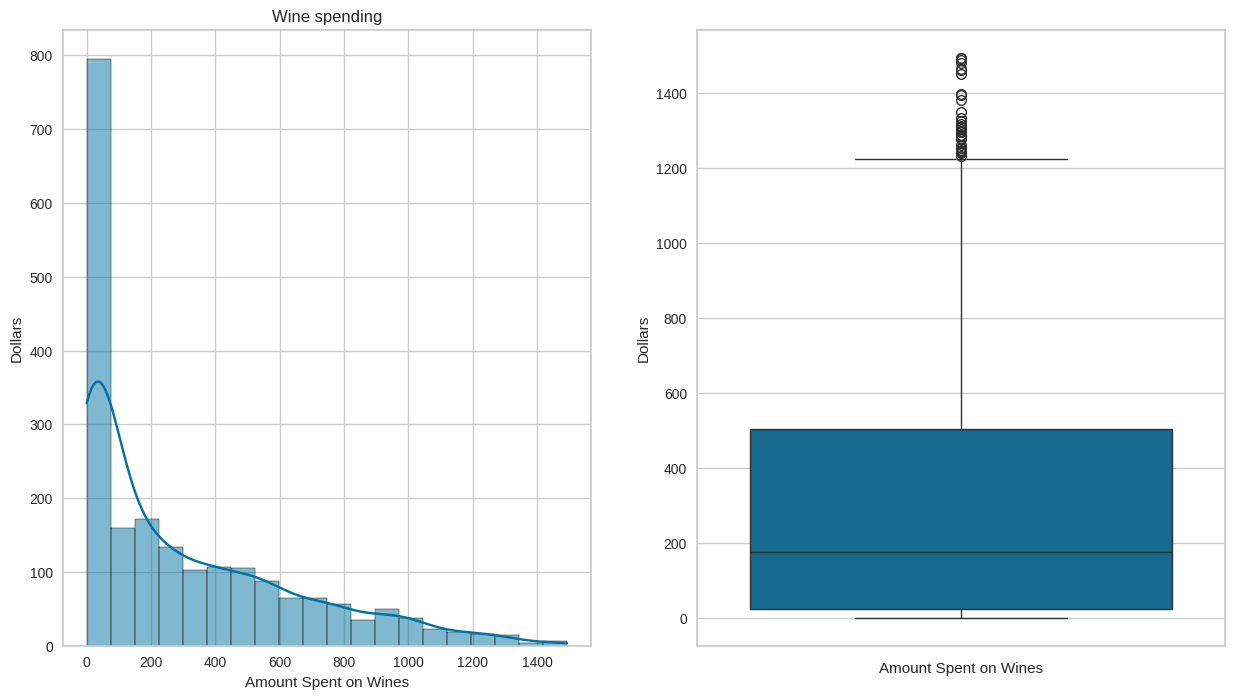

In [34]:
#Histplot and boxplot for MntWines
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Wine spending')
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Dollars')
sns.histplot(data['MntWines'], kde=True); #added KDE to better visualize the distribution
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Wines')
plt.ylabel('Dollars')
sns.boxplot(data['MntWines']);

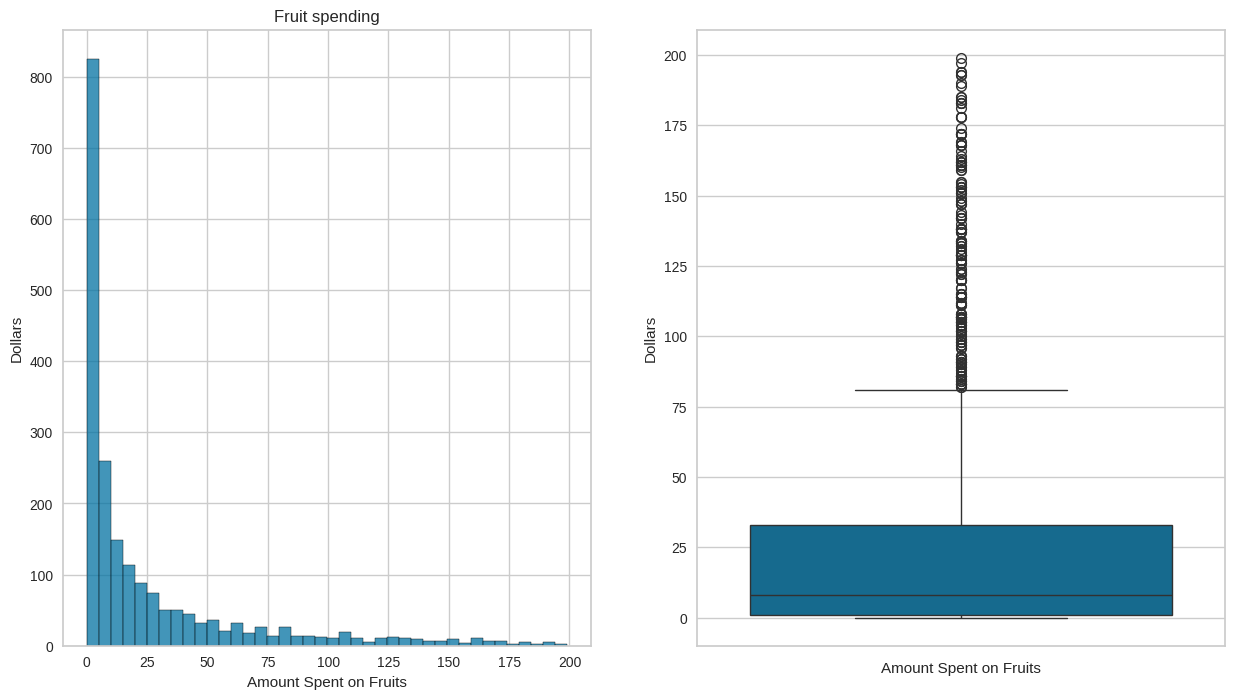

In [35]:
#Histplot and boxplot for MntFruits
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Fruit spending')
plt.xlabel('Amount Spent on Fruits')
plt.ylabel('Dollars')
sns.histplot(data['MntFruits']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Fruits')
plt.ylabel('Dollars')
sns.boxplot(data['MntFruits']);

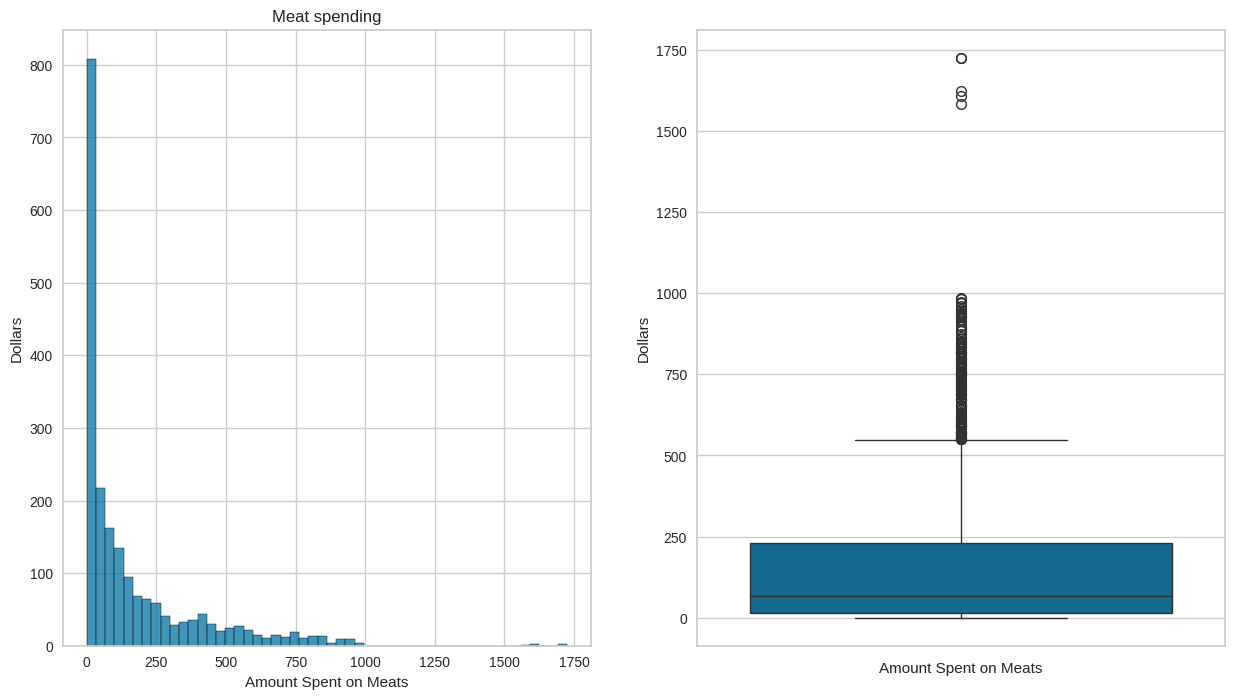

In [36]:
#Histplot and boxplot for MntMeatProducts
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Meat spending')
plt.xlabel('Amount Spent on Meats')
plt.ylabel('Dollars')
sns.histplot(data['MntMeatProducts']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Meats')
plt.ylabel('Dollars')
sns.boxplot(data['MntMeatProducts']);

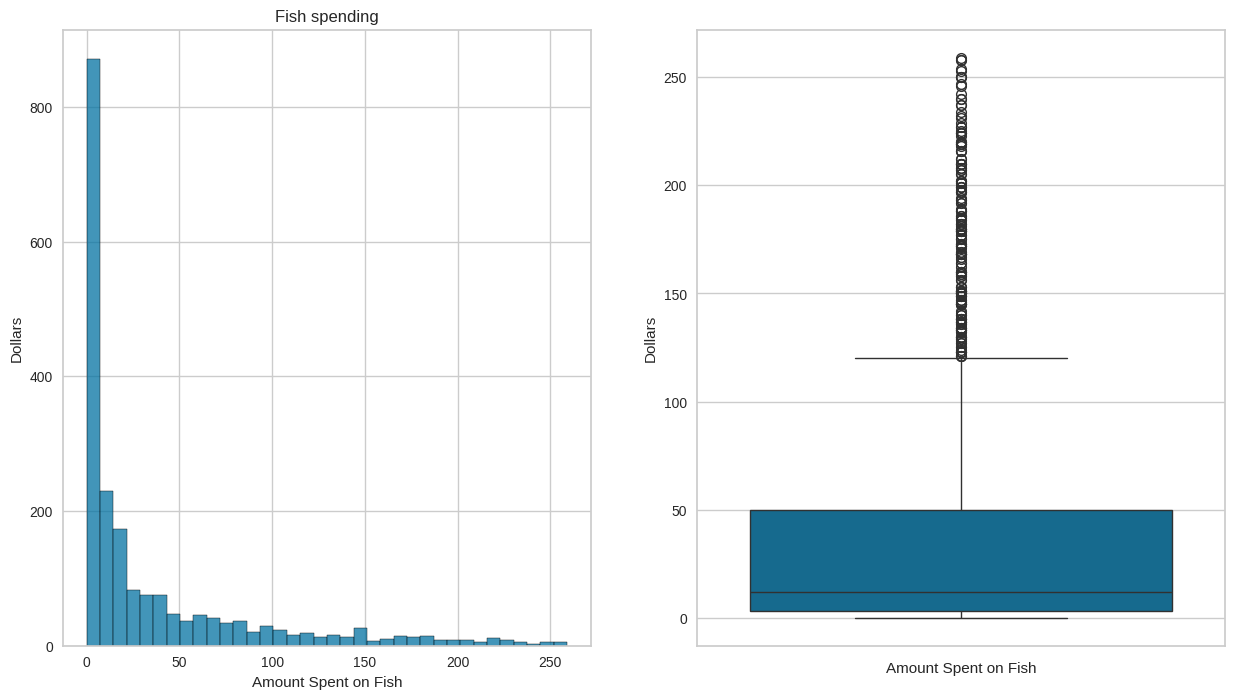

In [37]:
#Histplot and boxplot for MntFishProducts
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Fish spending')
plt.xlabel('Amount Spent on Fish')
plt.ylabel('Dollars')
sns.histplot(data['MntFishProducts']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Fish')
plt.ylabel('Dollars')
sns.boxplot(data['MntFishProducts']);

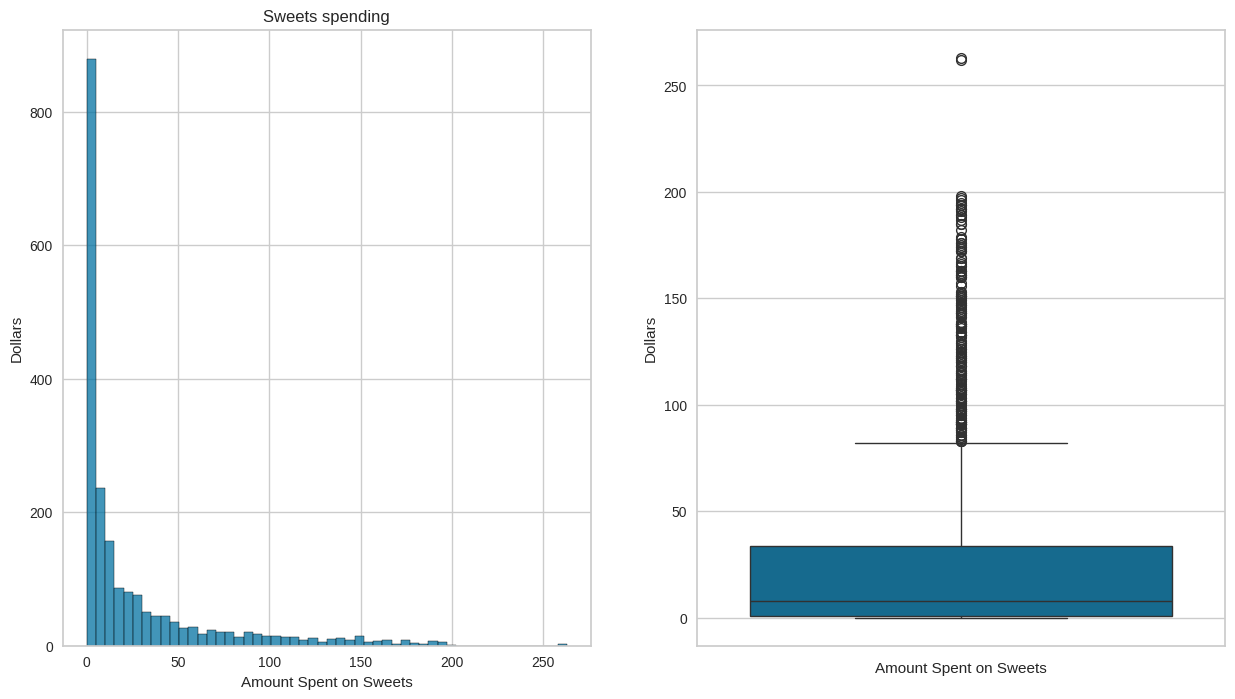

In [38]:
#Histplot and boxplot for MntSweetProducts
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Sweets spending')
plt.xlabel('Amount Spent on Sweets')
plt.ylabel('Dollars')
sns.histplot(data['MntSweetProducts']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Sweets')
plt.ylabel('Dollars')
sns.boxplot(data['MntSweetProducts']);

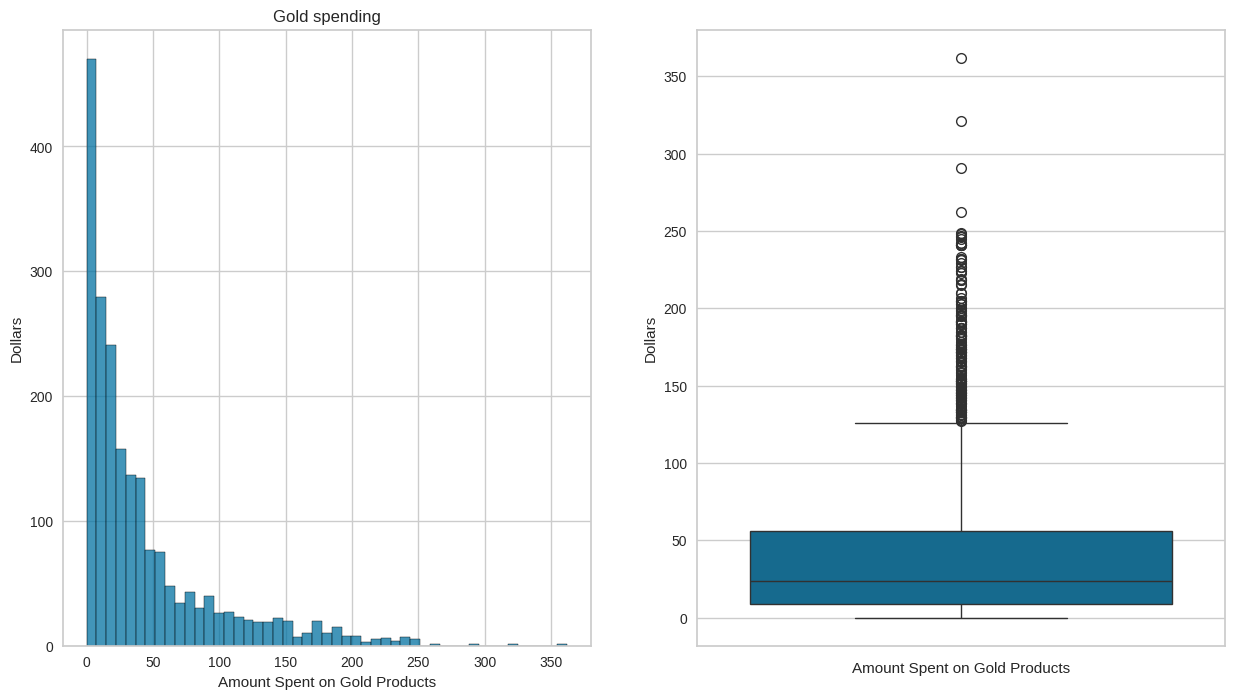

In [39]:
#Histplot and boxplot for MntGoldProds
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Gold spending')
plt.xlabel('Amount Spent on Gold Products')
plt.ylabel('Dollars')
sns.histplot(data['MntGoldProds']);
plt.subplot(1,2,2)
plt.xlabel('Amount Spent on Gold Products')
plt.ylabel('Dollars')
sns.boxplot(data['MntGoldProds']);

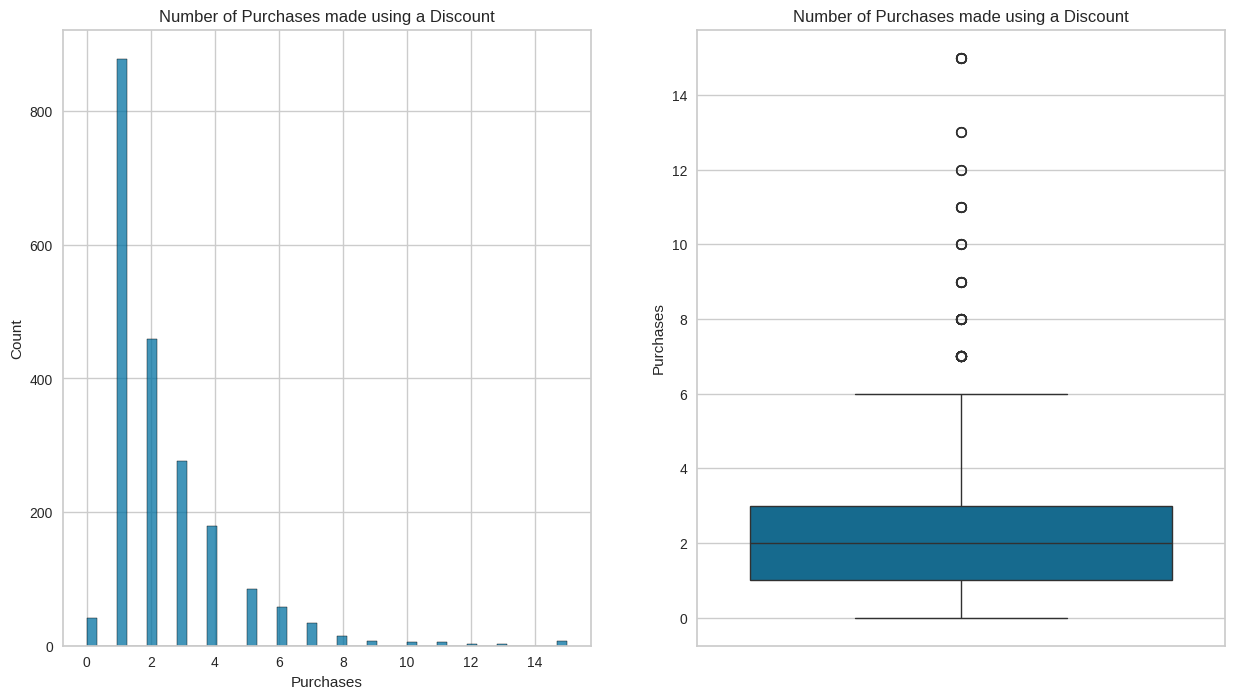

In [40]:
#Histplot and boxplot for NumDealsPurchases
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of Purchases made using a Discount')
sns.histplot(data['NumDealsPurchases']);
plt.xlabel('Purchases')
plt.subplot(1,2,2)
plt.title('Number of Purchases made using a Discount')
plt.ylabel('Purchases')
sns.boxplot(data['NumDealsPurchases']);

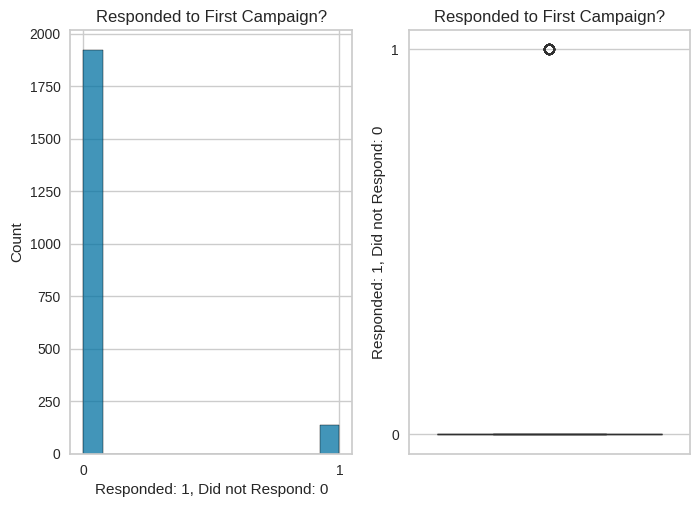

In [41]:
#Histplot and boxplot for AcceptedCmp1
plt.subplot(1,2,1)
plt.title('Responded to First Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp1']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to First Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp1']);

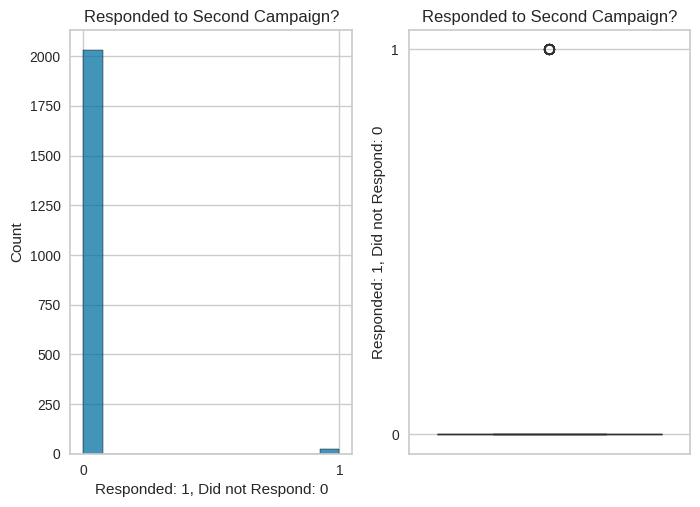

In [42]:
#Histplot and boxplot for AcceptedCmp2
plt.subplot(1,2,1)
plt.title('Responded to Second Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp2']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to Second Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp2']);

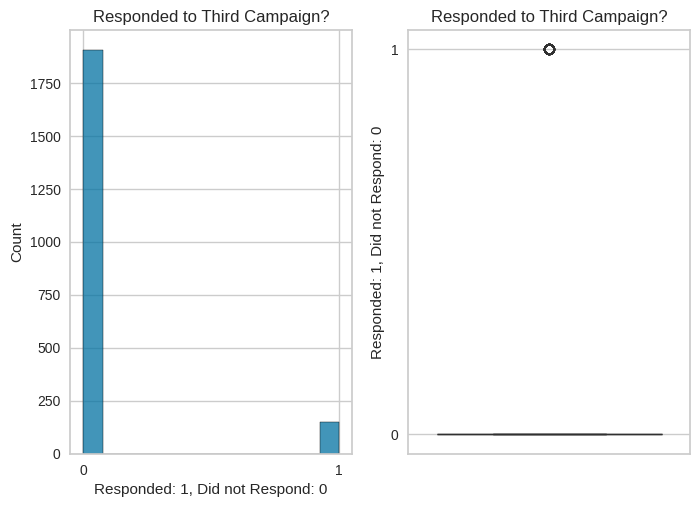

In [43]:
#Histplot and boxplot for AcceptedCmp3
plt.subplot(1,2,1)
plt.title('Responded to Third Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp3']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to Third Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp3']);

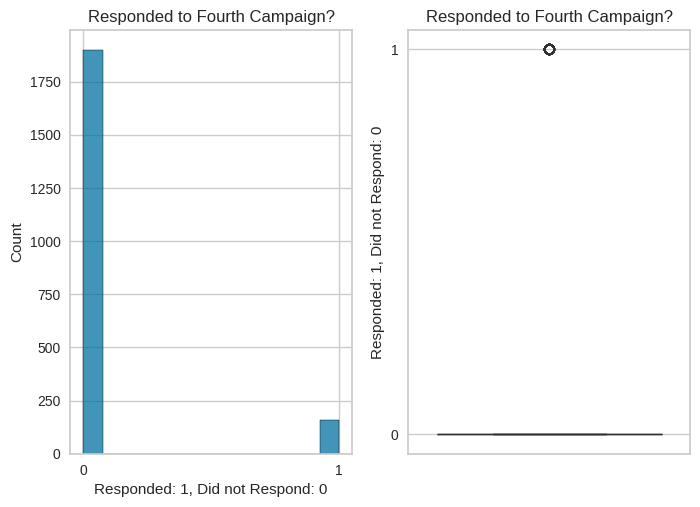

In [44]:
#Histplot and boxplot for AcceptedCmp4
plt.subplot(1,2,1)
plt.title('Responded to Fourth Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp4']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to Fourth Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp4']);

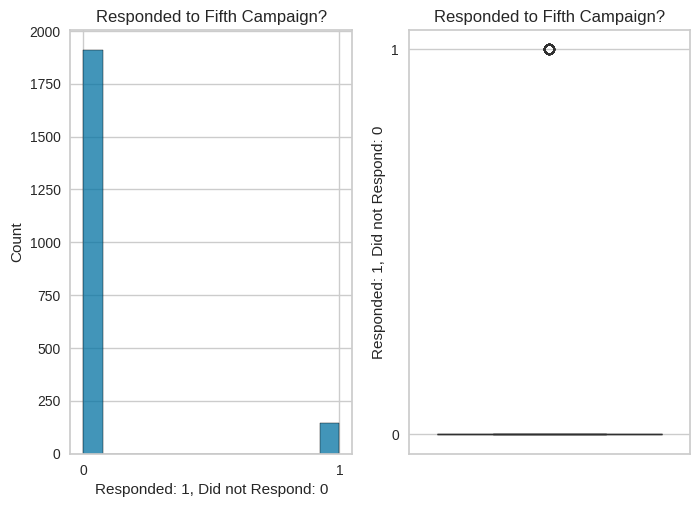

In [45]:
#Histplot and boxplot for AcceptedCmp5
plt.subplot(1,2,1)
plt.title('Responded to Fifth Campaign?')
plt.xticks([0,1])
sns.histplot(data['AcceptedCmp5']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to Fifth Campaign?')
plt.yticks([0,1])
sns.boxplot(data['AcceptedCmp5']);

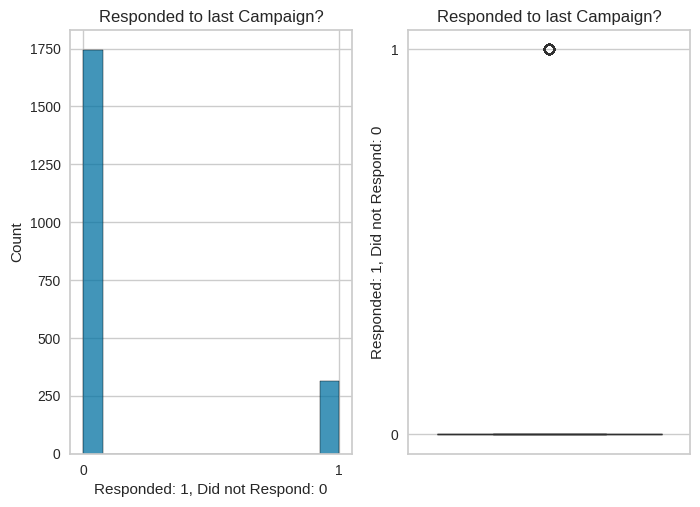

In [46]:
#Histplot and boxplot for Response
plt.subplot(1,2,1)
plt.title('Responded to last Campaign?')
plt.xticks([0,1])
sns.histplot(data['Response']);
plt.xlabel('Responded: 1, Did not Respond: 0')
plt.subplot(1,2,2)
plt.ylabel('Responded: 1, Did not Respond: 0')
plt.title('Responded to last Campaign?')
plt.yticks([0,1])
sns.boxplot(data['Response']);

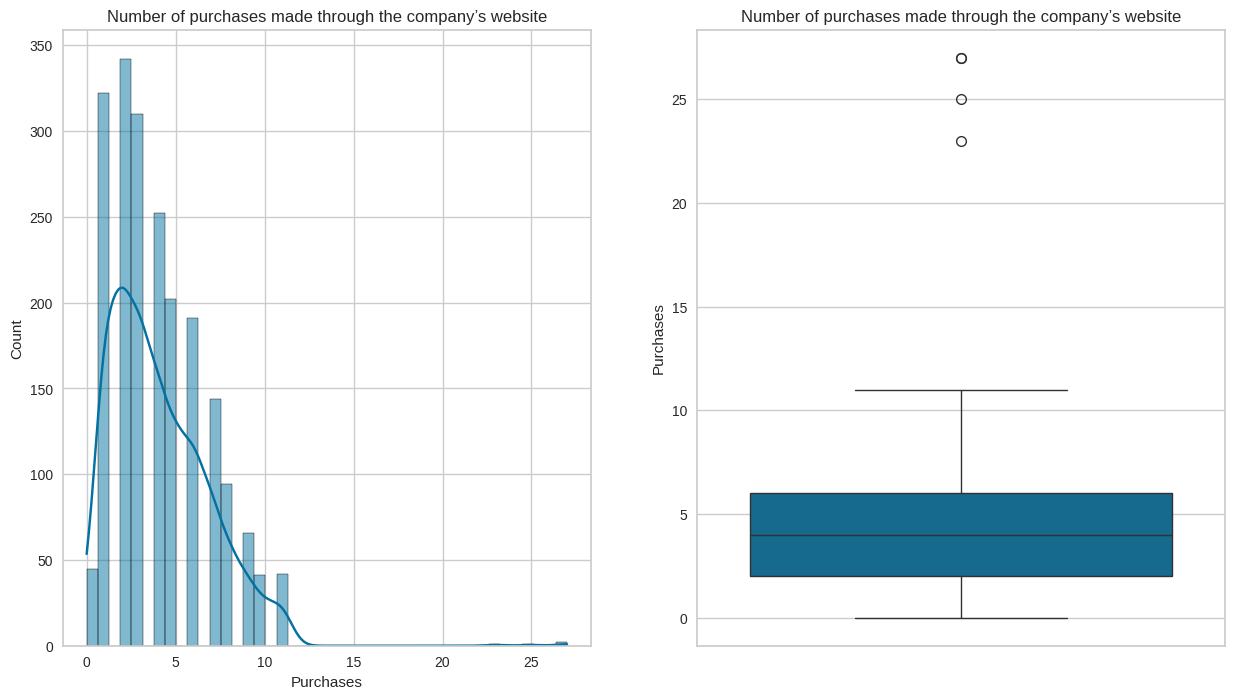

In [47]:
#Histplot and boxplot for NumWebPurchases
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of purchases made through the company’s website')
sns.histplot(data['NumWebPurchases'], kde=True); #added KDE to better visualize the distribution
plt.xlabel('Purchases')
plt.subplot(1,2,2)
plt.title('Number of purchases made through the company’s website')
plt.ylabel('Purchases')
sns.boxplot(data['NumWebPurchases']);

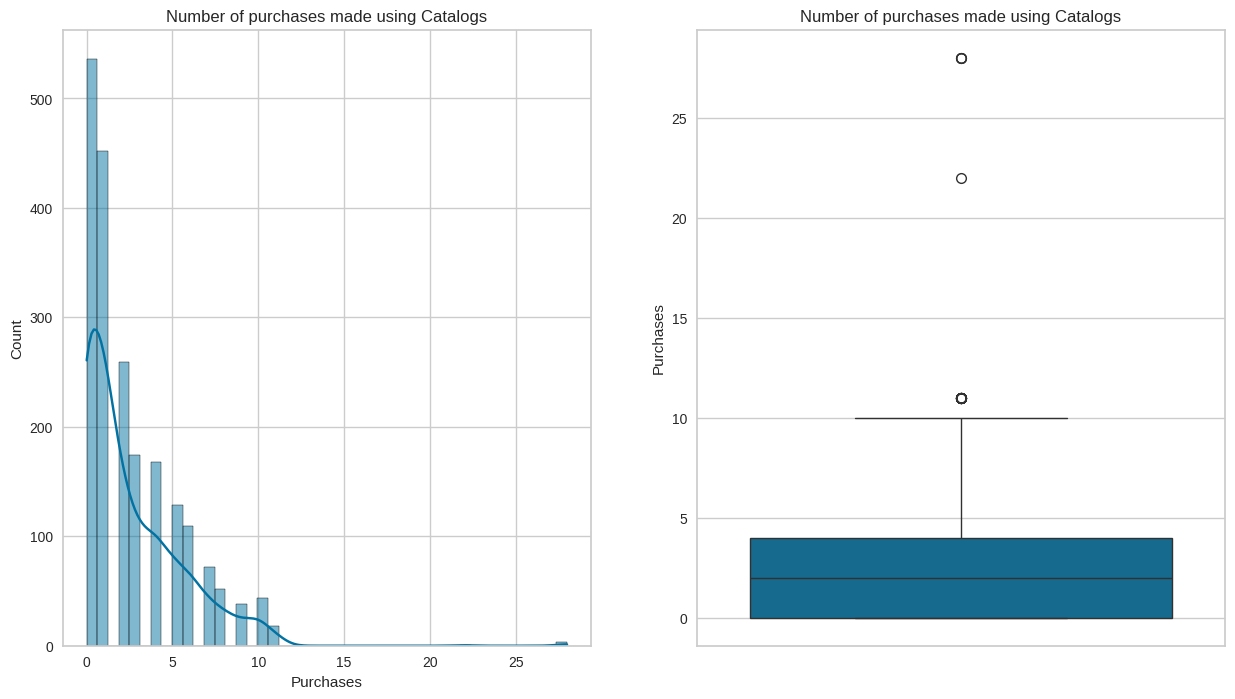

In [48]:
#Histplot and boxplot for NumCatalogPurchases
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of purchases made using Catalogs')
sns.histplot(data['NumCatalogPurchases'], kde=True); #added KDE to better visualize the distribution
plt.xlabel('Purchases')
plt.subplot(1,2,2)
plt.title('Number of purchases made using Catalogs')
plt.ylabel('Purchases')
sns.boxplot(data['NumCatalogPurchases']);

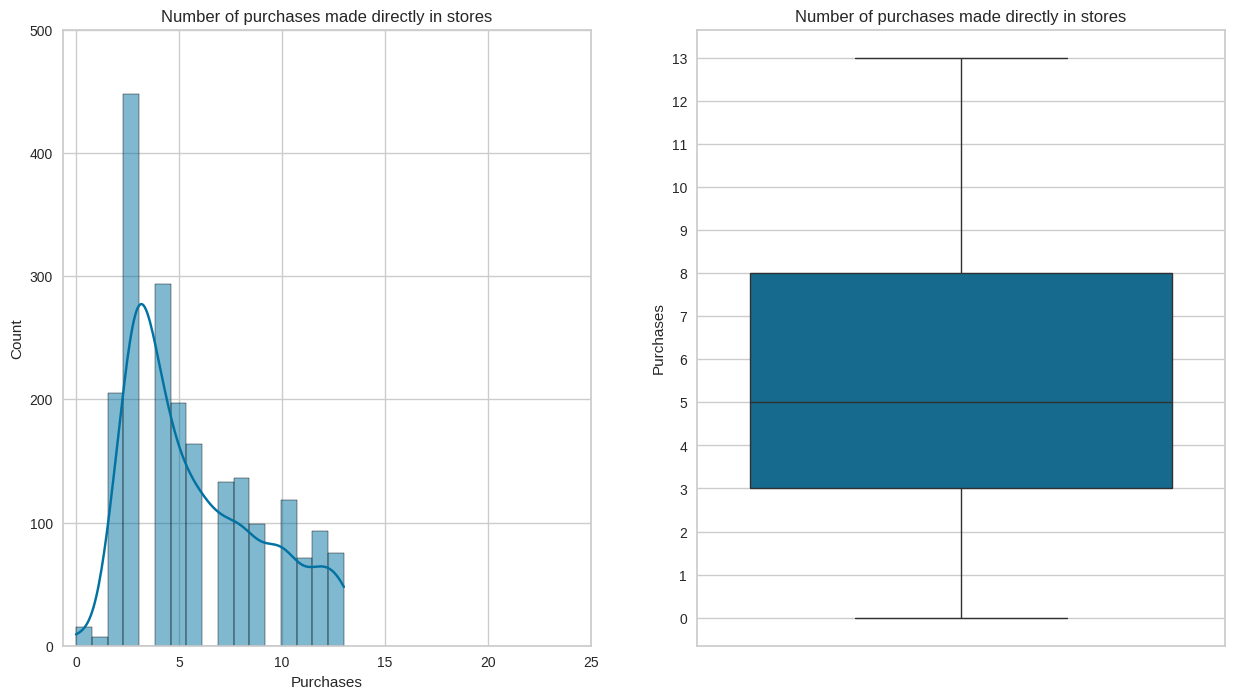

In [49]:
#Histplot and boxplot for NumStorePurchases
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of purchases made directly in stores')
sns.histplot(data['NumStorePurchases'], kde=True);
plt.xlabel('Purchases')
plt.xticks(range(0,26, 5)) #increased max limit of x axis to make it easier to visually compare with the purchases charts above
plt.yticks(range(0,600, 100)) #increased max limit of y axis to make it easier to visually compare with the purchases charts above
plt.subplot(1,2,2)
plt.title('Number of purchases made directly in stores')
plt.ylabel('Purchases')
plt.yticks(range(0,26))
sns.boxplot(data['NumStorePurchases']);

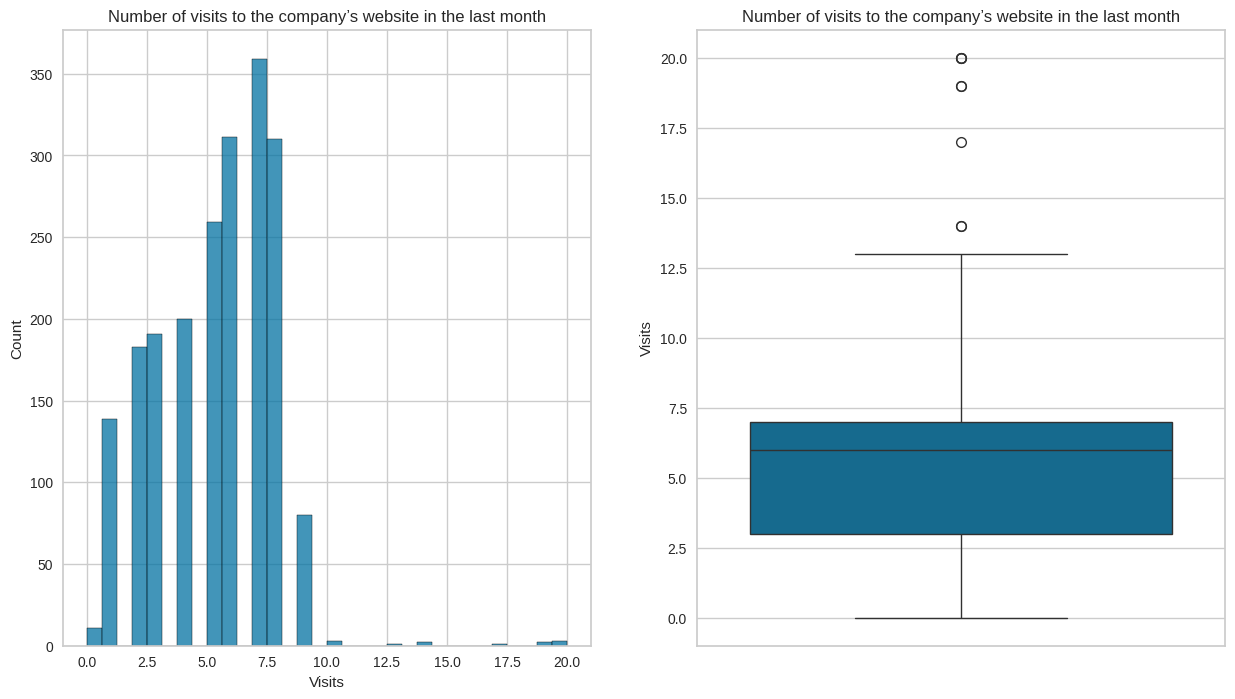

In [50]:
#Histplot and boxplot for NumWebVisits
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Number of visits to the company’s website in the last month')
sns.histplot(data['NumWebVisitsMonth']);
plt.xlabel('Visits')
plt.subplot(1,2,2)
plt.title('Number of visits to the company’s website in the last month')
plt.ylabel('Visits')
sns.boxplot(data['NumWebVisitsMonth']);

##### **Observations:**

Customers spent the most on (from most to least):

1. Wines
2. Meats
3. Gold
4. Fruits, Fish, and Sweets

**Discounts**

Almost all customers take advantage using a Discount at least one (1) time.

The majority of customers do not respond to Campaigns. You get < 10% of them responded to, at best.

Customers are more likely to make a purchase online via, in descending order:
1. The company's website
2. Directly in-store
3. Via catalog

With a sharp drop in purchases made via in-store and via catalog

**Website visits the past month**

Half of all customers making between 3-7 visits the past month.

### Bivariate Analysis

#### **As required by project assignment:**
Perform multivariate analysis to explore the relationsips between the variables.

**Observations are made below the heatmap.**

In [1]:
data_corr=data.corr()
plt.figure(figsize=(28,10))
sns.heatmap(data_corr, annot=True, cmap="YlGnBu");

NameError: name 'data' is not defined

##### **Observations:**

**Customers have the highest correlation to purchase:**
1. Meats via catalog
2. Wines in-store
3. Wines via catalog
4. Wines online
5. Meats in-store

**Customers have higher correlation to purchase foods in some combination. In descending order:**
1. Fruits and Fish
2. Fish and Sweets
3. Fruits and Sweets
4. Meats and Fish
5. Wines and Meats
6. Fruits and Meats

**Highest correlation for website purchases:**
1. Wines
2. Gold
3. Sweets

**Highest correlation for in-store purchases:**
1. Wines
2. Meats
3. Fish or Fruits (tie)

**Highest correlation for catalog purchases:**
1. Meats
2. Wines
3. Fruits

**PURCHASE AND CAMPAIGN INTERACTION**

Customers have a higher correlation to purchases Wines with more recent campaigns.

Correlation dipped by the third campaign, but increased on the 4th and 5th campaign. The biggest drop in correlation came in the final campaign.

This pattern was pretty consistent for all other products, as well.